In [ ]:
import numpy as np
import matplotlib as mpl

import multiverse_python as mp

In [2]:
lmin = 7
lmax = lmin+7
Lbox_cMpc = 2**lmax / 1000

In [4]:
h_00000, deltab_00000 = mp.processing.readOverdensity("./deltab_lcdm_lmin07_00000")
h_00001, deltac_00001 = mp.processing.readOverdensity("./deltac_lcdm_lmin07_00001")
h_00150, deltac_00150 = mp.processing.readOverdensity("./deltac_lcdm_lmin07_00150")

Block size for header:  44
Header successfully read!
Data successfully read!
Block size for header:  44
Header successfully read!
Data successfully read!
Block size for header:  44
Header successfully read!
Data successfully read!


In [5]:
info_00001 = mp.snapshot.loadInfo(basePath="/data2/gilee/Multiverse/lmin07/LCDM", snapNum=1)
info_00010 = mp.snapshot.loadInfo(basePath="/data2/gilee/Multiverse/lmin07/LCDM", snapNum=10)
info_00150 = mp.snapshot.loadInfo(basePath="/data2/gilee/Multiverse/lmin07/LCDM", snapNum=150)


[Load Info]
  Found info: /data2/gilee/Multiverse/lmin07/LCDM/output_00001/info_00001.txt
  keys in info: dict_keys(['ncpu', 'ndim', 'levelmin', 'levelmax', 'ngridmax', 'nstep_coarse', 'boxlen', 'time', 'aexp', 'H0', 'omega_m', 'omega_l', 'omega_k', 'omega_b', 'unit_l', 'unit_d', 'unit_t', 'ordering type'])

[Load Info]
  Found info: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/info_00010.txt
  keys in info: dict_keys(['ncpu', 'ndim', 'levelmin', 'levelmax', 'ngridmax', 'nstep_coarse', 'boxlen', 'time', 'aexp', 'H0', 'omega_m', 'omega_l', 'omega_k', 'omega_b', 'unit_l', 'unit_d', 'unit_t', 'ordering type'])

[Load Info]
  Found info: /data2/gilee/Multiverse/lmin07/LCDM/output_00150/info_00150.txt
  keys in info: dict_keys(['ncpu', 'ndim', 'levelmin', 'levelmax', 'ngridmax', 'nstep_coarse', 'boxlen', 'time', 'aexp', 'H0', 'omega_m', 'omega_l', 'omega_k', 'omega_b', 'unit_l', 'unit_d', 'unit_t', 'ordering type'])


In [18]:
list(info_00001.keys())

['ncpu',
 'ndim',
 'levelmin',
 'levelmax',
 'ngridmax',
 'nstep_coarse',
 'boxlen',
 'time',
 'aexp',
 'H0',
 'omega_m',
 'omega_l',
 'omega_k',
 'omega_b',
 'unit_l',
 'unit_d',
 'unit_t',
 'ordering type']

In [6]:
table = mp.processing.loadTimeTable("lcdm")


[Load Time Table]
  cosmology: lcdm
  (w0, wa) = (-1.0, 0.0)
  Found time table: /md/gilee/cosmos-in-us/Multiverse-utils/notebooks/friedmann/time_table_cpl-1.0+0.0.csv


,t,tau0,tau1,a
0,1.000000e-08,1.000000e-08,1.000000e-08,1.000000
1,1.002005e-08,1.002005e-08,1.002005e-08,1.000000
2,1.004014e-08,1.004014e-08,1.004014e-08,1.000000
3,1.006028e-08,1.006028e-08,1.006028e-08,1.000000
4,1.008045e-08,1.008045e-08,1.008045e-08,1.000000
...,...,...,...,...
9782,1.002562e+00,3.237304e+00,5.352141e+01,0.004559
9783,1.002602e+00,3.243795e+00,5.498120e+01,0.004338
9784,1.002641e+00,3.250300e+00,5.651943e+01,0.004122
9785,1.002679e+00,3.256818e+00,5.814261e+01,0.003911


In [11]:
info_00150['unit_l'] * mp.const.cm_to_Mpc

16.356005002188564

In [7]:
info_00150['unit_t'] * mp.const.sec_to_yr / 1e9

13.568723699634386

In [ ]:
np.interp(-info_00001['time'], table['t'], table['a'])

<IPython.core.display.Javascript object>


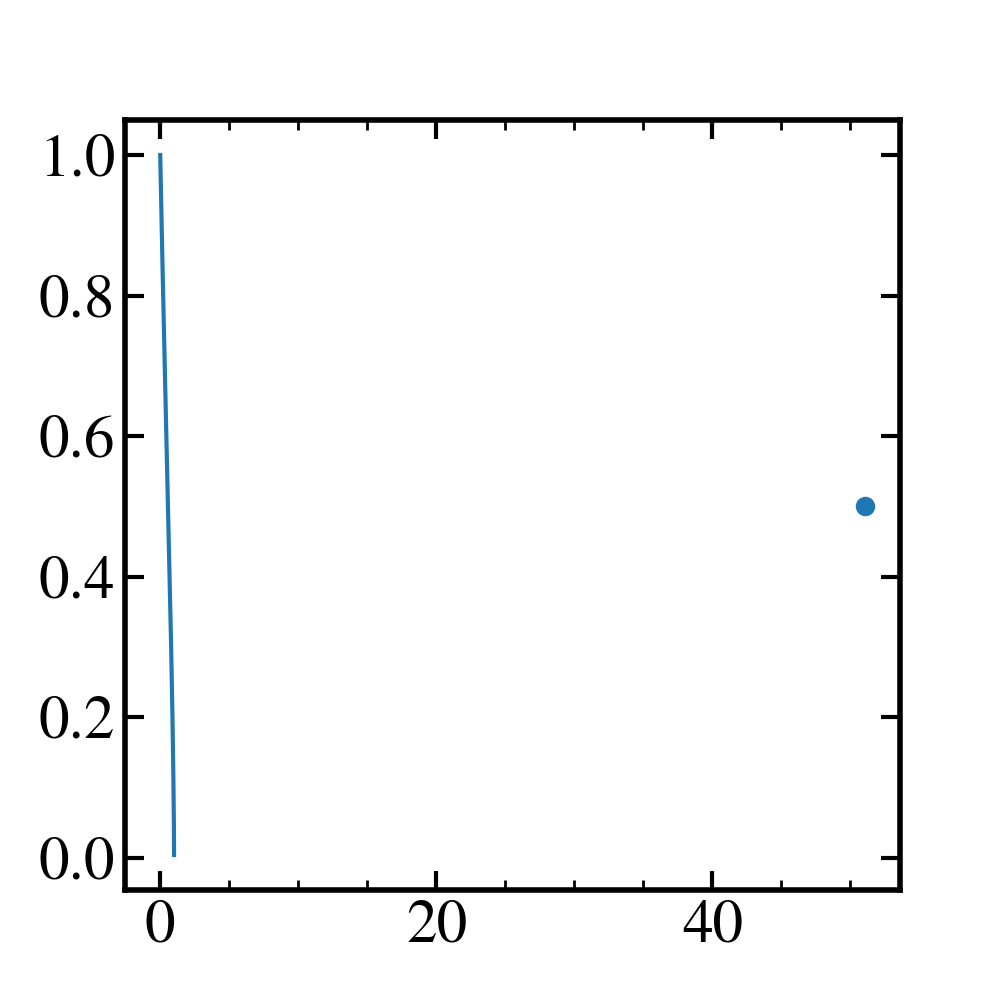

In [32]:
plt.figure(figsize=(5, 5))
plt.plot(table['t'], table['a'])







plt.scatter(-info_00001['time'], 0.5)

In [33]:
info_00001['aexp']

0.00497512426227331

In [34]:
info_00010['aexp']

0.104867885545952

In [35]:
info_00150['aexp']

1.00014666915642

In [36]:
from matplotlib.colors import LogNorm

def plot_overdensity(delta, idx=0):    
    
    delta = delta[idx] + 1

    idx = 0 #slice index
    
    plt.figure(figsize=(6.55, 5))
    im = plt.imshow(
        delta, 
        origin='lower', 
        extent=[0, Lbox_cMpc, 0, Lbox_cMpc], 
        norm=LogNorm(), #(vmin=delta.min(), vmax=delta.max()),  # 로그 스케일 적용
        cmap='viridis'
    )

    plt.xlim(0, Lbox_cMpc)
    plt.ylim(0, Lbox_cMpc)
    plt.colorbar(im, label=r"$\delta(\vec{r}) + 1$")
    plt.xlabel('$x$ [$h^{-1}$Mpc]')
    plt.ylabel('$y$ [$h^{-1}$Mpc]')
    plt.tight_layout()

<IPython.core.display.Javascript object>


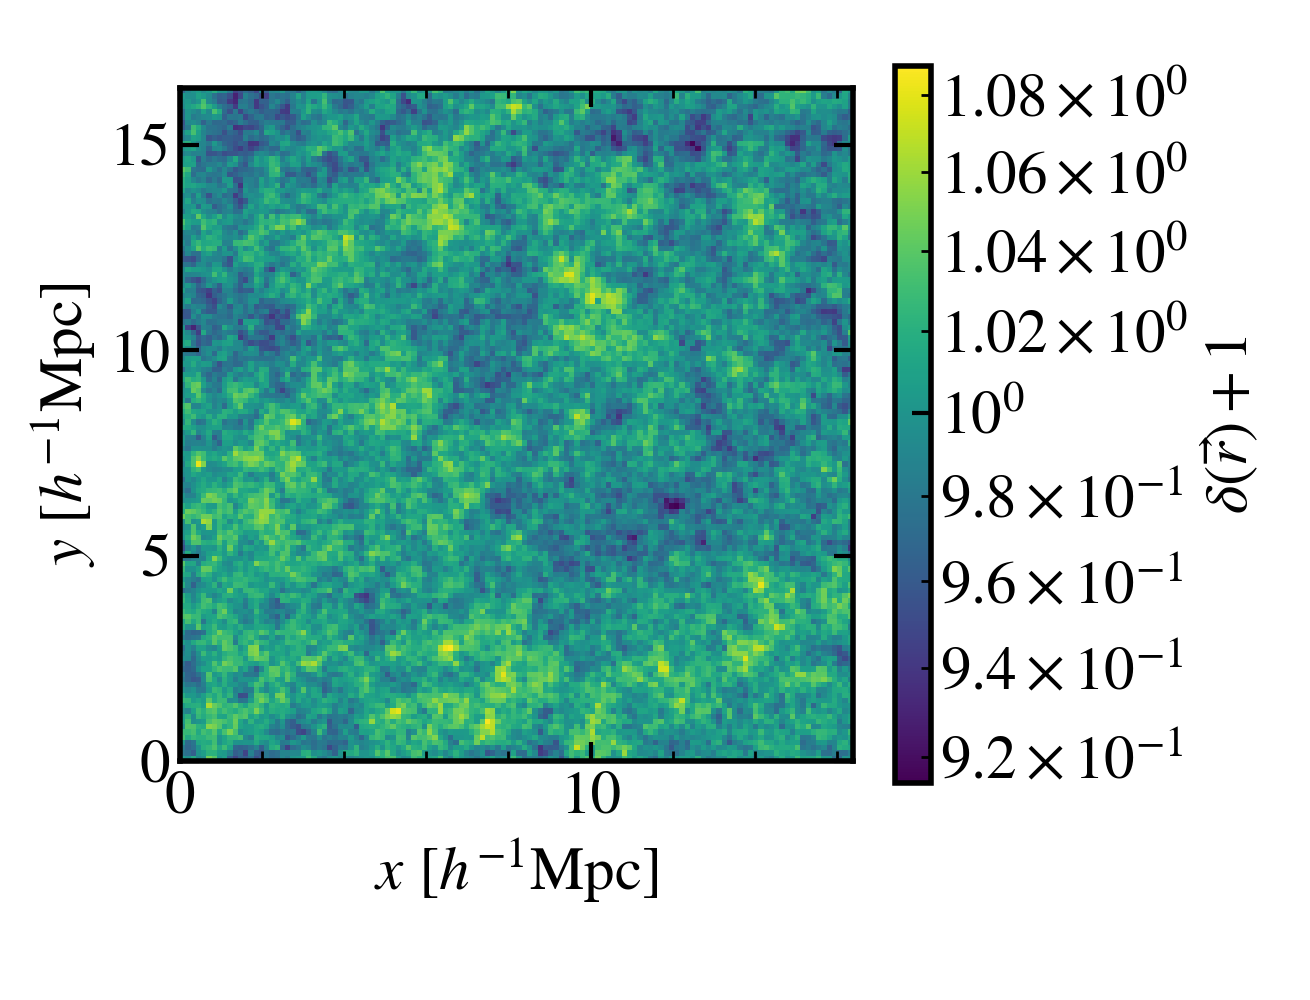

<IPython.core.display.Javascript object>


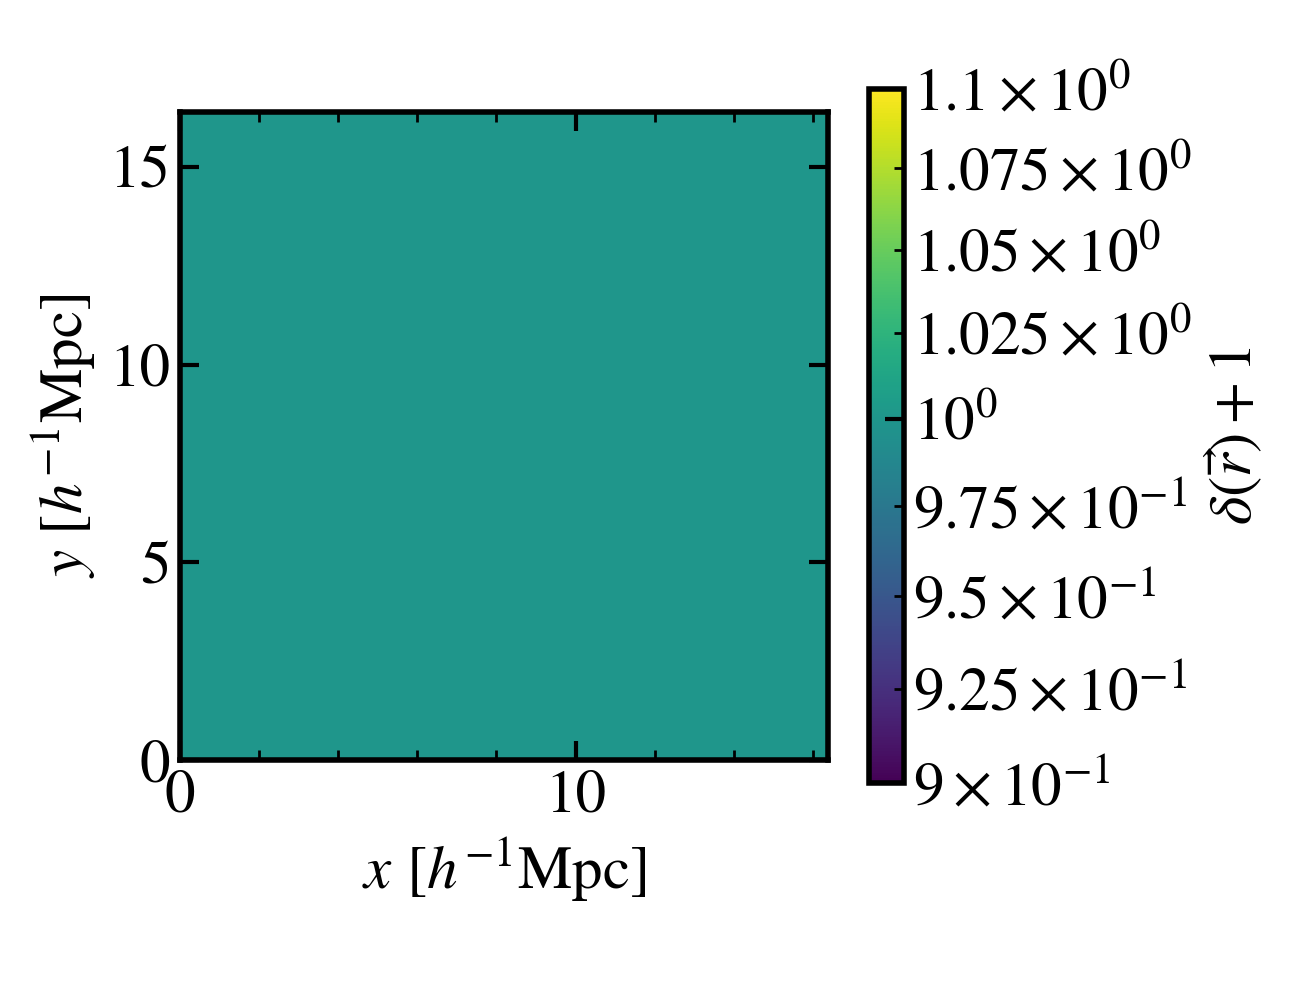

<IPython.core.display.Javascript object>


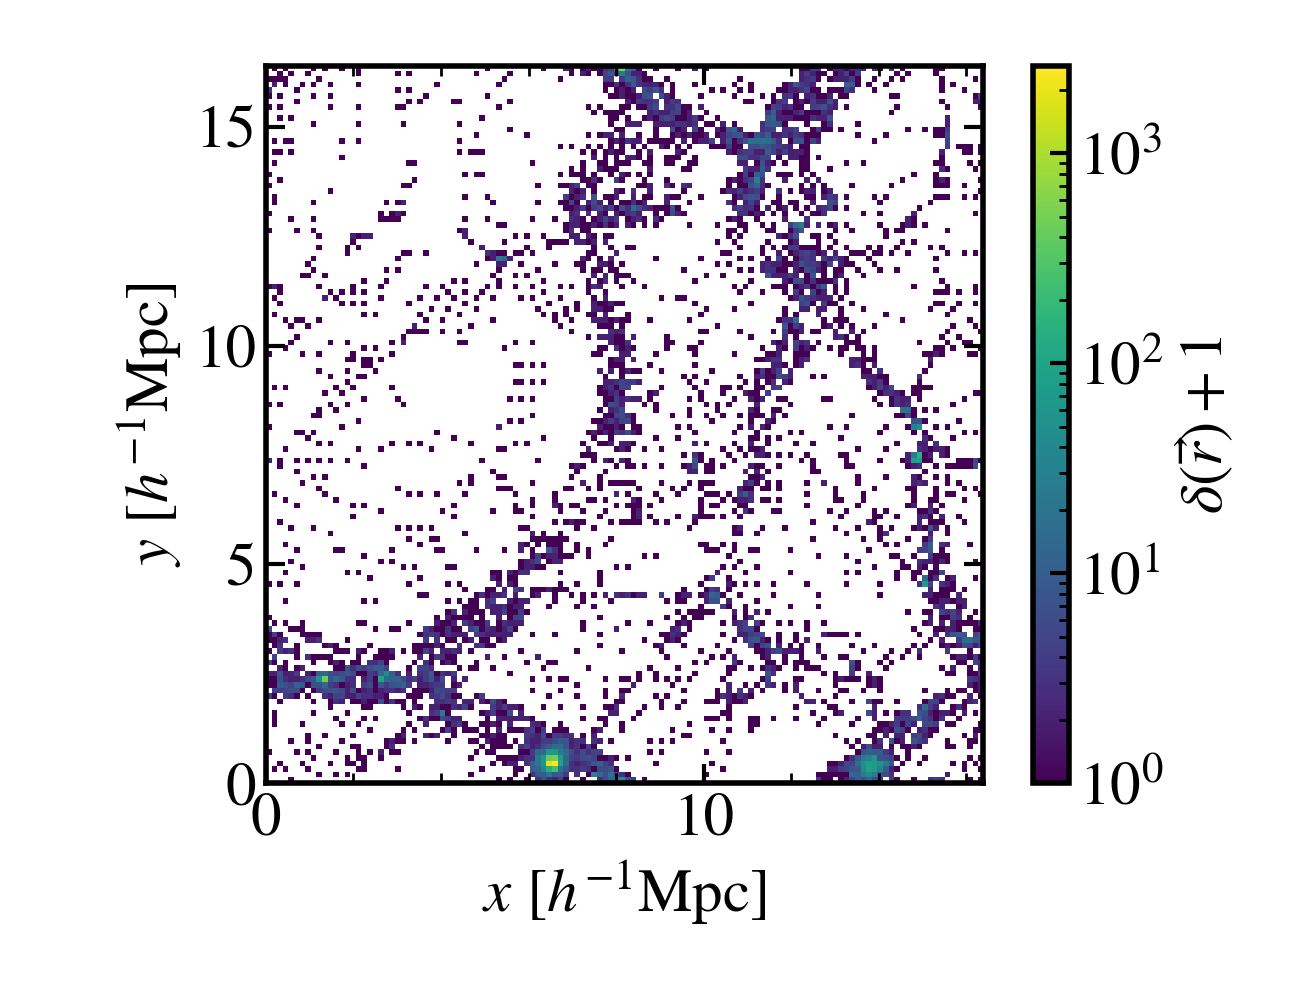

In [37]:
plot_overdensity(deltab_00000)
plot_overdensity(deltac_00001)
plot_overdensity(deltac_00150)

In [40]:
psb_00000 = np.loadtxt("./psb_lcdm_lmin07_00000.out", skiprows=1, usecols=(1,2), unpack=True)
psc_00001 = np.loadtxt("./psc_lcdm_lmin07_00001.out", skiprows=1, usecols=(1,2), unpack=True)
psc_00010 = np.loadtxt("./psc_lcdm_lmin07_00010.out", skiprows=1, usecols=(1,2), unpack=True)
psc_00150 = np.loadtxt("./psc_lcdm_lmin07_00150.out", skiprows=1, usecols=(1,2), unpack=True)

<IPython.core.display.Javascript object>


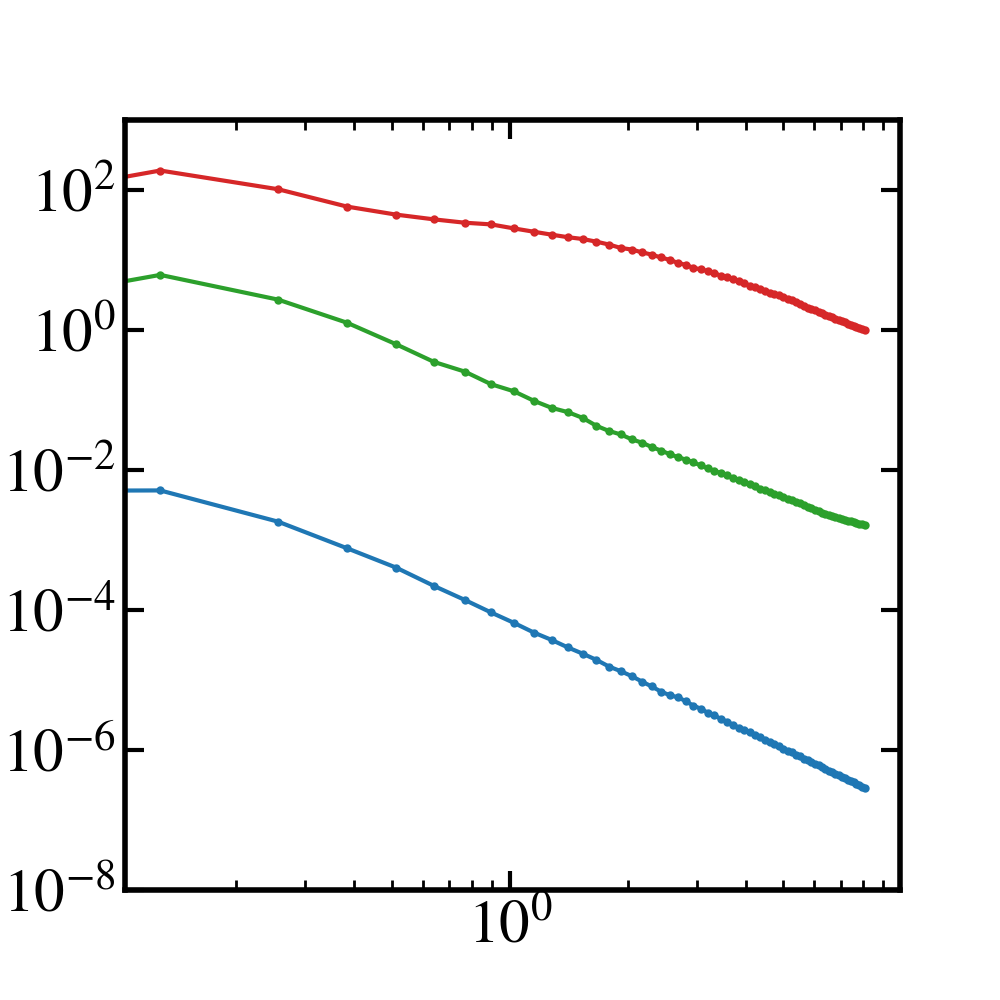

(1e-08, 1000.0)

In [39]:
plt.figure(figsize=(5, 5))

plt.loglog(psb_00000[0]*Lbox_cMpc/2**lmin, psb_00000[1]*Lbox_cMpc**3, "o-", ms=2, label="z=200")
plt.loglog(psc_00001[0]*Lbox_cMpc/2**lmin, psc_00001[1]*Lbox_cMpc**3, "o-", ms=2, label="")
plt.loglog(psc_00010[0]*Lbox_cMpc/2**lmin, psc_00010[1]*Lbox_cMpc**3, "o-", ms=2, label="")
plt.loglog(psc_00150[0]*Lbox_cMpc/2**lmin, psc_00150[1]*Lbox_cMpc**3, "o-", ms=2, label="")
plt.ylim(1e-8, 1e3)